AIM: To compare different bag-of-word modes using a neural network.

In [1]:
import helper_vocab, helper_analysis
from collections import Counter
import seaborn as sns
import numpy

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bhavsarkau60ine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-10-16 12:13:50.159845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 12:13:50.159877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### VOCABULARY CREATION
> To create all present tokens list.

In [2]:
vocab_filename = 'Data/Vocab/vocab_all_occ.txt' # vocab filename with its location
vocab_counter = Counter() # define vocab counter
helper_vocab.process_docs('Data/Raw/pos', vocab_counter) # add all positive label documents to vocab
helper_vocab.process_docs('Data/Raw/neg', vocab_counter) # add all negative label documents to vocab
print('Vocabulary Length (all tokens present in the document): ', len(vocab_counter))
helper_vocab.save_token_list(vocab_counter, vocab_filename) #saving list of all the tokens in a file

Vocabulary Length (all tokens present in the document):  43961


### COMPARING WORD SCORING METHODS
> To compare the word scoring methods (Bag-of-Words) using the neural network model.

In [3]:
# load the vocabulary
vocab = helper_analysis.load_doc(vocab_filename)
vocab = set(vocab.split())

In [4]:
# load all reviews
train_docs, ytrain = helper_analysis.load_clean_dataset(vocab, True)
test_docs, ytest = helper_analysis.load_clean_dataset(vocab, False)

In [5]:
# prepare data for mode and evaluate model for different modes
modes = ['binary', 'count', 'tfidf', 'freq'] # list of modes
results = dict()
for mode in modes:
    Xtrain, Xtest = helper_analysis.prepare_data(train_docs, test_docs, mode)
    results[mode] = helper_analysis.evaluate_mode(numpy.array(Xtrain), numpy.array(ytrain), numpy.array(Xtest), numpy.array(ytest))
    print('Mode: ', mode, ' | Accuracy: ', results[mode])

2022-10-16 12:13:57.196167: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-16 12:13:57.196223: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-16 12:13:57.196243: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (92ca0cc5b47f): /proc/driver/nvidia/version does not exist
2022-10-16 12:13:57.196517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Mode:  binary  | Accuracy:  0.9222797751426697
Mode:  count  | Accuracy:  0.8911917209625244
Mode:  tfidf  | Accuracy:  0.8704662919044495
Mode:  freq  | Accuracy:  0.8601036071777344


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0.92228'),
 Text(0, 0, '0.891192'),
 Text(0, 0, '0.870466'),
 Text(0, 0, '0.860104')]

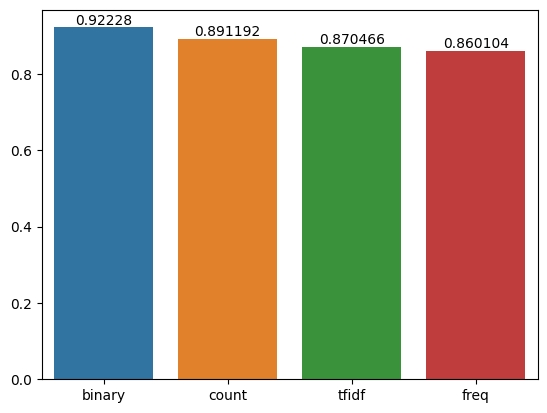

In [6]:
# plot values on a bar plot
ax = sns.barplot(list(results.keys()), list(results.values()))
ax.bar_label(ax.containers[0])

All the tokens when used to compare all the four modes of bag-of-words, we find that 'binary' mode has the highest accuracy.